# Predicting Weight as a function of Height

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the data

In [3]:
data = pd.read_csv("./weight-height.csv")

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
data.shape

(10000, 3)

The total data contains 10000 observations.

## Take a random sample of 20% of the data

In [5]:
sampled_data = data.sample(frac=0.2)

In [6]:
sampled_data.head()

,Gender,Height,Weight
3631,Male,68.531220,192.525148
9664,Female,63.859279,154.232094
5458,Female,63.910516,140.730952
9046,Female,64.946316,149.602103
4828,Male,67.165859,182.680352


In [8]:
sampled_data.shape

(2000, 3)

In [9]:
male_gender_count = sum(sampled_data['Gender']=='Male')
female_gender_count = sum(sampled_data['Gender']=='Female')

In [10]:
male_gender_count

967

In [11]:
female_gender_count

1033

## Plot the data to undersand the relationship between weight and height

In [12]:
weights = sampled_data['Weight'].values
heights = sampled_data['Height'].values

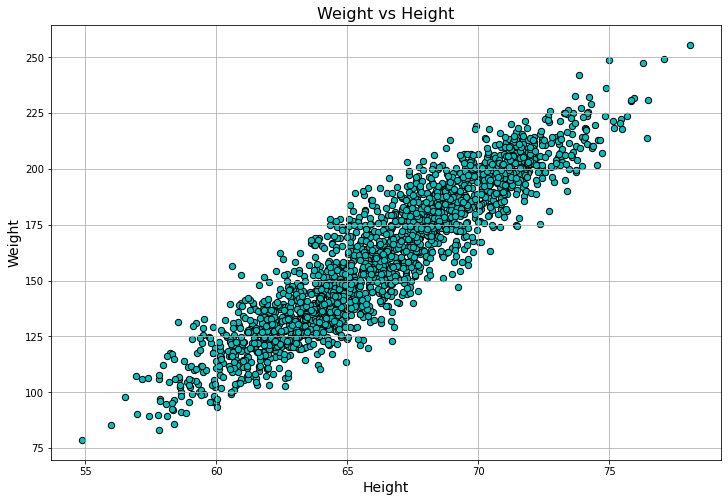

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(x=heights, y=weights, s=40, color='c', edgecolor='k')
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.grid()
plt.show()

**Observations:**

1. There is a strong positive linear relationship among weight and height.
2. We can fit a OLS regression line of the form:
   $$\hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x$$
   
   Where $\hat{y}$ is the predicted value of the target variable i.e. "Weight" and $x$ is the predictor variable i.e. "Height".

## OLS Fit

As this is a single predictor (Simple Linear Regression) we can use following formula to determine the values of $\hat{\theta}_0$ and $\hat{\theta}_1$.

$$ \hat{\theta}_1 = r_{xy} \frac{\sigma_y}{\sigma_x} $$

$$ \hat{\theta}_0 = \bar{y} - \hat{\theta}_1 \bar{x} $$

$r_{xy}$ is the correlation coefficient between $x$ and $y$

$\sigma_x$ is the standard deviation of $x$

$\sigma_y$ is the standard deviation of $y$

$\bar{x}$ is the mean of $x$ and $\bar{y}$ is the mean of $y$ 

### mean and std. dev. of x

In [17]:
x_mean = heights.mean()

x_std = heights.std()

### mean and std. dev. of y

In [19]:
y_mean = weights.mean()

y_std = weights.std()

### correlation coefficient between x and y

In [22]:
rxy = np.corrcoef(heights, weights)[0,1]

In [23]:
rxy

0.9226918132459477

### Calculate $\hat{\theta}_1$

In [24]:
theta_1 = rxy * y_std / x_std

In [25]:
theta_1

7.695874345687242

### Calculate $\hat{\theta}_0$

In [26]:
theta_0 = y_mean - (theta_1 * x_mean)

In [27]:
theta_0

-349.4332446514544

## Use OLS fit equation to predict weight of a person given his / her height

The OLS equation:

$$\hat{y} = \hat{\theta}_0 + \hat{\theta}_1 x $$

$$\hat{weight} = -349.433 + 7.696 \times height$$

In [29]:
def predict(theta_0, theta_1, x):
    return (theta_0 + theta_1 * x)

In [30]:
predict(theta_0, theta_1, 70)

189.2779595466526

The *expected* value of weight for height = 70 is 189.28 

In [31]:
predict(theta_0, theta_1, 60)

112.31921608978013

## Plot the regression line

In [28]:
x_min = heights.min()
x_max = heights.max()

In [32]:
x_values = np.linspace(x_min, x_max, 100)

In [34]:
y_values = theta_0 + theta_1 * x_values

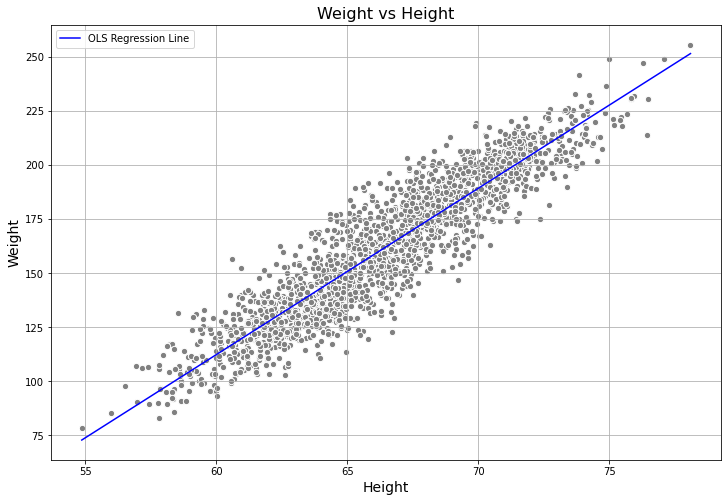

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(x=heights, y=weights, s=40, color='gray', edgecolor='w')
plt.plot(x_values, y_values, color='b', label='OLS Regression Line')
plt.title("Weight vs Height", fontsize=16)
plt.xlabel("Height", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.grid()
plt.legend()
plt.show()